Tensor
--------------------------------------------

Tensors are similar to NumPy’s ndarrays, except that tensors can run on
GPUs or other specialized hardware to accelerate computing.

In [ ]:
import torch
import numpy as np

In [ ]:
# make a tensor
data = [[1, 2],[3, 4]]
my_tensor = torch.tensor(data)

In [ ]:
# make a tensor from a NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
# the other way around
x_np+=1
new_np_array=x_np.numpy()
print(f"new_np_array: \n {new_np_array}")

new_np_array: 
 [[2 3]
 [4 5]]


In [ ]:
# make a tensor from another tensor
ones_tensor = torch.ones_like(my_tensor) 
print(f"Ones Tensor: \n {ones_tensor} \n")

rand_tensor = torch.rand_like(my_tensor, dtype=torch.float)
print(f"Random Tensor: \n {rand_tensor} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7877, 0.4257],
        [0.1742, 0.7867]]) 



In [ ]:
# make a tensor of a certain shape
shape = (2,3,)
zeros_tensor = torch.zeros(shape)
print(f"Zeros Tensor: \n {zeros_tensor}")

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# check a tensor's attributes
print(f"Shape of tensor: {zeros_tensor.shape}")
print(f"Datatype of tensor: {zeros_tensor.dtype}")
print(f"Device tensor is stored on: {zeros_tensor.device}")

Shape of tensor: torch.Size([2, 3])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
# move a tensor to the GPU if available
if torch.cuda.is_available():
  my_tensor = my_tensor.to('cuda')

In [ ]:
# concatenate a sequence of tensors along a given dimension
t1 = torch.cat([my_tensor, my_tensor, my_tensor], dim=1)
print(t1)

tensor([[1, 2, 1, 2, 1, 2],
        [3, 4, 3, 4, 3, 4]], device='cuda:0')


In [ ]:
# This computes the element-wise product
print(f"my_tensor.mul(my_tensor) \n {my_tensor.mul(my_tensor)} \n")
# Alternative syntax:
print(f"my_tensor * my_tensor \n {my_tensor * my_tensor}")

my_tensor.mul(my_tensor) 
 tensor([[ 1,  4],
        [ 9, 16]], device='cuda:0') 

my_tensor * my_tensor 
 tensor([[ 1,  4],
        [ 9, 16]], device='cuda:0')


In [ ]:
my_tensor = torch.tensor(data)

In [ ]:
# This computes the matrix multiplication between two tensors
print(f"my_tensor.matmul(my_tensor.T) \n {my_tensor.matmul(my_tensor.T)} \n")
# Alternative syntax:
print(f"my_tensor @ my_tensor.T \n {my_tensor @ my_tensor.T}")

my_tensor.matmul(my_tensor.T) 
 tensor([[ 5, 11],
        [11, 25]]) 

my_tensor @ my_tensor.T 
 tensor([[ 5, 11],
        [11, 25]])


In [ ]:
# Operations that have a _ suffix are in-place
print(my_tensor, "\n")
my_tensor.add_(5)
print(my_tensor)
# problematic when computing derivatives because of an immediate loss of history

tensor([[1, 2],
        [3, 4]]) 

tensor([[6, 7],
        [8, 9]])


train a model
---------------------------------
can be just as simple as follows.

In [ ]:
# load a pretrained resnet18 model from torchvision for an example
# create a random data with 3 channels, height&width of 64
# and its corresponding labels
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64) #"torch.nn" only supports mini-batches.
labels = torch.rand(1, 1000)

In [ ]:
# forward pass
prediction=model(data)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
# calculate the error
loss=(prediction-labels).sum()

In [ ]:
# backward pass
loss.backward()

In [ ]:
# load an optimizer
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [ ]:
# do one step of gradient descent
optim.step()

torch.autograd
---------------------------------
``torch.autograd`` is PyTorch’s automatic differentiation engine that powers
neural network training.

In [ ]:
#"requires_grad=True" signals to "autograd" that every operation on them should be tracked
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

In [ ]:
# let's assume that Q is the error, and a&b are the parameters of a NN
Q = 3*a**3 - b**2

# Q consists of a variable whose operation is being tracked,
# so every operation on Q is also being tracked.
print(f"Does Q require gradients? : {Q.requires_grad}")

Does Q require gradients? : True


\begin{align}\frac{\partial Q}{\partial a} = 9a^2\end{align}

\begin{align}\frac{\partial Q}{\partial b} = -2b\end{align}

In [ ]:
# When we call ".backward()" on Q,
# autograd calculates these gradients and stores them in the respective tensors' ".grad" attribute.
# Let's assume that the error was [1, 1]
Q.backward(gradient=torch.tensor([1., 1.]))

In [ ]:
print(a.grad)
print(b.grad)

tensor([36., 81.])
tensor([-12.,  -8.])


Neural Networks
===============

Neural networks can be constructed using the ``torch.nn`` package.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# First you need to inherit nn.Module to make a NN model
class myNet(nn.Module): #takes 32x32 input, returns 1x10 output

    def __init__(self):
        super().__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x): # input is 32x32
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # so far, 32x32→28x28→14x14→10x10→5x5 (regardless of channels)

        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = myNet()
print(net)

myNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
# The learnable parameters of a model are returned by "net.parameters()"

params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [ ]:
# Let's let the model take one input

input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.1116,  0.0772,  0.0693,  0.0542, -0.0259, -0.0364, -0.0630, -0.0617,
         -0.0123, -0.0338]], grad_fn=<AddmmBackward>)


In [ ]:
# calculate the error

target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(out, target)
print(loss)

tensor(0.7314, grad_fn=<MseLossBackward>)


In [ ]:
# backprop

# zero the gradient of all parameters
# This is needed because every time a variable is back-propogated through, 
# the gradient will be accumulated instead of being replaced.
net.zero_grad()  

loss.backward()

In [ ]:
# update the parameters

# by using this package, no need to use for sentence to update all the parameters
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()


optimizer.step()    # Does the update

In [ ]:
# using GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device：", device)

net.to(device)

Making datasets
===============

Datasetの運用に必要なステップは以下の三つ。<br>
- transformsによる前処理の定義
- Datasetsによる前処理&ダウンロード
- DataloaderによるDatasetの使用

In [ ]:
import torch
import torchvision
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

前処理の定義

In [ ]:
# PIL imageまたはndarrayの「Height×Width×Channel」を
# Tensor型のdata「Channel×Height×Width」に変換する
# さらに各輝度値の範囲を自動で [0.0,1.0]にしてくれる

trans_simplest=torchvision.transforms.ToTensor()

# この場合、Tensor型data = trans_simplest(PILまたはndarray)のように使える

In [ ]:
# さらに複数の前処理の過程を組み合わせることができる
# 以下ではTensor変換の後に正規化を行っている

trans = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),\
                                        torchvision.transforms.Normalize((0.5,), (0.5,))])

In [ ]:
from google.colab import files
files.upload()

Saving IMG_0375.JPG to IMG_0375.JPG


{'IMG_0375.JPG': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1\x1b\x84Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x05\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00J\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00R\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00Z\x00\x00\x00\xb4\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01\x00\x07\x90\x00\x00\x07\x00\x00\x00\x040221\x91\x01\x00\x07\x00\x00\x00\x04\x01\x02\x03\x00\xa0\x00\x00\x07\x00\x00\x00\x040100\xa0\x01\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x04\xe5\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x06@\xa4\x06\x00\x03\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x01\x03\x00\x03\x00\x00\x00\x01\x00\x06\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x01\x02\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x01\n\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x01\x00\x04\x00\x00\x00\x01\

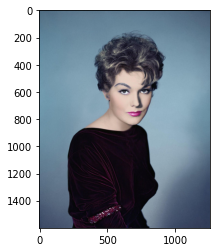

In [ ]:
img=Image.open("/content/IMG_0375.JPG")
plt.imshow(img)
plt.show()

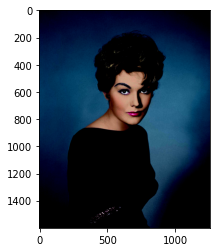

In [ ]:
img=trans(img)
img = img.numpy().transpose((1, 2, 0)) #tensor型からnumpy型に戻す
img = np.clip(img, 0, 1) #0-1に値を制限
plt.imshow(img)
plt.show()

In [ ]:
# 自分でtransformを定義することもできる
# 以下のように訓練時と検証時で異なった動作を行わせることができる
# これは訓練時にデータオーギュメンテーションを行う際に有効

class myTransform():
    def __init__(self, mean, std):
        self.data_transform={
            "train": torchvision.transforms.Compose([
                                         torchvision.transforms.RandomHorizontalFlip(), #0.5の確率で左右反転する、PIL imageとTensorの両方を受け取るらしい
                                         torchvision.transforms.ToTensor(),
                                         torchvision.transforms.Normalize(mean, std)
            ]),
            "val": torchvision.transforms.Compose([
                                         torchvision.transforms.ToTensor(),
                                         torchvision.transforms.Normalize(mean, std)
            ])

        }
    def __call__(self, img, phase="train"):
        return self.data_transform[phase](img)


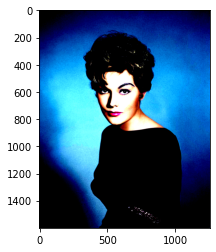

In [ ]:
img=Image.open("/content/IMG_0375.JPG")
myTrans=myTransform(0.5,0.2)
img=myTrans(img, phase="train")
img = img.numpy().transpose((1, 2, 0))
img = np.clip(img, 0, 1) 
plt.imshow(img)
plt.show()

Datasetsによる前処理&ダウンロード

In [ ]:
#まずはダウンロード
#rootはダウンロード先
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=trans)


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
print(trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [ ]:
#Datasetを自作することもできる
#実践的には手元にあるデータファイルのパスを指定してデータを取り出す感じになる

class Mydataset(torch.utils.data.Dataset): #torch.utils.data.Datasetを継承
    def __init__(self, transform=None): 
        self.transform=transform
        self.data=[1,2,3,4,5,6]
        self.label=[1,0,1,0,1,1]
    def __len__(self): #datasetの長さを返す
        return len(self.data)
    def __getitem__(self,idx): #dataを取り出す
        next_data=self.data[idx]
        next_label=self.label[idx]
        return next_data, next_label

In [ ]:
dataset=Mydataset()
print(len(dataset)) #dataset.__len__(self)を呼んでいる
print(dataset[3]) #dataset.__getitem__(self,3)を呼んでいる

6
(4, 0)


DataloaderによるDatasetの使用

In [ ]:
#dataloaderは自作する必要がない。むしろtransformとdatasetはこれに合うように作らないといけない。
#torch.utils.data.DataLoaderクラスを使う。
#batch_sizeはミニバッチのサイズを表す。一度の計算で使うデータの数。全データ数を割り切れる数にする。
#shuffle=Trueにすることで、dataの参照がランダムに。
#num_workersはミニバッチの取り出しをmulti-process、つまり並列処理する

trainloader = torch.utils.data.DataLoader(dataset, batch_size = 2, shuffle = True, num_workers = 2)

In [ ]:
#dataloaderはループで使う

for i in range(2):
    for data,label in trainloader:
        break
    print("{}回目のループ".format(i+1))
    print(data)
    print(label)
    print("")

1回目のループ
tensor([2, 1])
tensor([0, 1])

2回目のループ
tensor([4, 2])
tensor([0, 0])



In [ ]:
print(trainloader.dataset)
print(trainloader.batch_size)